# Cluster SPT-Sample:

info: https://pole.uchicago.edu/public/data/sptsz-clusters/

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from astropy.table import Table, vstack
from astropy.io.fits import getdata

# Load

In [112]:
path = '/data/des61.a/data/johnny/DESY3/desy3/data/spt/'
fname_out = path+'join_2500d_sptecs.fits'

In [16]:
path = '/data/des61.a/data/johnny/DESY3/desy3/data/spt/'
fname1 = path+'2500d_cluster_sample_Bocquet19.fits'
fname2 = path+'sptecs_catalog_oct919.fits'

data1 = Table(getdata(fname1))
data2 = Table(getdata(fname2))

## zcut
data1 = data1[data1['REDSHIFT']>0.05]
data2 = data2[data2['REDSHIFT']>0.05]

In [79]:
# join SPT-ECS and SPT-2500d
data = vstack([data1,data2])
data

SPT_ID,RA,DEC,FIELD,XI,THETA_CORE,YSZ,DYSZ,REDSHIFT,REDSHIFT_UNC,REDSHIFT_LIMIT,XRAY,SPECZ,WEAK_LENSING,M500,M500_uerr,M500_lerr,M200,M200_uerr,M200_lerr,M500_marge,M500_marge_uerr,M500_marge_lerr,M200_marge,M200_marge_uerr,M200_marge_lerr,REDSHIFT_SOURCE,RM_PROB,CL_NOTES,M500_UERR,M500_LERR,LAMBDA_CHISQ,LAMBDA_CHISQ_E,RADIO_CONTAM,STRONG_LENS,IMAGE_SOURCE,SPECZ_REF,STRONG_LENS_REF,PHOTOMETRIC_ZREF,tile
str16,float64,float64,str14,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,str50,float32,float32,float32,float32,float32,float32,float32,str38,str19,str29,int64
SPT-CLJ0000-4356,0.066333582,-43.949439,ra1hdec-42.5,5.9151344,0.25,7.650118e-05,2.135001e-05,0.734,0.04554,0.0,0,0,0,4.00756767538851,0.6696077812096588,0.7358692529405331,6.292206379578352,1.0696490838992085,1.18459226059643,3.5500422302100803,0.6519442834143079,0.831643842408234,5.559913375169347,1.0375980588899347,1.3356196167956451,--,--,--,--,--,--,--,--,--,--,--,--,--,--
SPT-CLJ0000-5748,0.24991181,-57.806424,ra23h30dec-55,8.492383,0.50000006,8.2779006e-05,1.2720419e-05,0.7019,0.0,0.0,1,1,1,4.880870635158218,0.5879111394744845,0.7094774760787965,7.677948502001076,0.94157802239312,1.1433088769049728,4.329364965813076,0.6491734843411727,0.8554956365889081,6.793488680833069,1.035012721459414,1.3745721381478697,--,--,--,--,--,--,--,--,--,--,--,--,--,--
SPT-CLJ0001-4024,0.36103009,-40.410795,ra1hdec-42.5,5.423737,0.75,5.9888156e-05,1.2804807e-05,0.8326,0.03207,0.0,0,0,0,3.617254543611976,0.640498013281908,0.7265002402869105,5.706003308000402,1.026863571708815,1.174778928865317,3.1947610159173947,0.6519590483640303,0.827227564640272,5.026785937007721,1.0399289918474048,1.3335682649066172,--,--,--,--,--,--,--,--,--,--,--,--,--,--
SPT-CLJ0001-4842,0.2767992,-48.713151,ra0h50dec-50,5.6873126,1.25,7.755943e-05,1.2656733e-05,0.328,0.02384,0.0,0,0,0,4.477776197741063,0.748972013145055,0.8318217613033903,6.825527578859748,1.1599982462428207,1.2972030444152525,3.8948523505717096,0.7542539774679335,0.8993084614849027,5.920979195138054,1.1630435404255302,1.3987907829088861,--,--,--,--,--,--,--,--,--,--,--,--,--,--
SPT-CLJ0001-5440,0.40586575,-54.669695,ra0h50dec-50,5.6890063,1.0000001,6.0299073e-05,1.2568876e-05,0.82,0.0819,0.0,0,0,0,3.88461245085613,0.6660283941969452,0.7519104574159527,6.13209461071124,1.0695253163242793,1.2178129685661023,3.4658438385927215,0.6387041822515891,0.8759238608343369,5.458166200227332,1.0198710083354374,1.4151160677386923,--,--,--,--,--,--,--,--,--,--,--,--,--,--
SPT-CLJ0001-6258,0.40289771,-62.980848,ra1hdec-60,4.6851354,1.5,5.1889023e-05,1.6237755e-05,0.21,0.02,0.0,0,0,0,3.892265439208595,0.6460582958978964,0.8675417170686877,5.854547768643311,0.9851962953027167,1.3335049681172384,3.3172411718546058,0.6583798479841492,0.876752749965021,4.974820969690957,0.9993607335027397,1.3427732914276174,--,--,--,--,--,--,--,--,--,--,--,--,--,--
SPT-CLJ0002-5557,0.51381378,-55.962062,ra1hdec-60,5.202786,0.25,5.4647022e-05,1.835388e-05,1.15,0.09675,0.0,0,0,0,3.1952132375529194,0.5605691443213949,0.6830300141923238,5.130159605033364,0.9152114645499063,1.1257056527012432,2.842941136935086,0.5838967711350862,0.8063917482145886,4.553694568272035,0.9488296847025035,1.3244864007604344,--,--,--,--,--,--,--,--,--,--,--,--,--,--
SPT-CLJ0007-4706,1.7513695,-47.11595,ra0h50dec-50,4.5494375,0.75,5.811859e-05,1.3450479e-05,0.4565,0.03688,0.0,0,0,0,3.645543999505982,0.5841570335113877,0.8269207591877978,5.593390300470237,0.9088866543699821,1.2979407095602165,3.1399355899846135,0.6178289900244929,0.8478339874779879,4.803660773286327,0.9580518337715596,1.3270946207759748,--,--,--,--,--,--,--,--,--,--,--,--,--,--
SPT-CLJ0010-5112,2.7408001,-51.207736,ra0h50dec-50,4.5146136,0.25,5.4955057e-05,1.2877083e-05,0.17,0.02141,0.0,0,0,0,3.915292780838394,0.6406466364844636,0.8801421457499692,5.868011982900622,0.9736355839717765,1.3481804520385303,3.3

## Visualize

Text(0,0.5,'N')

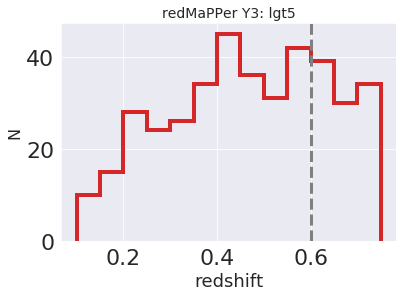

In [89]:
zcls = data1['REDSHIFT']
_ = plt.hist(zcls,bins=np.arange(0.1,0.8,0.05),histtype='step',lw=4,color='tab:red')
plt.axvline(0.6,ls='--',lw=3,color='gray')
plt.xlabel('redshift',fontsize=18)
plt.title('SPT-ECS+2500d',fontsize=14)
plt.ylabel('N',fontsize=16)

Text(0.5,0,'$M_{500}$')

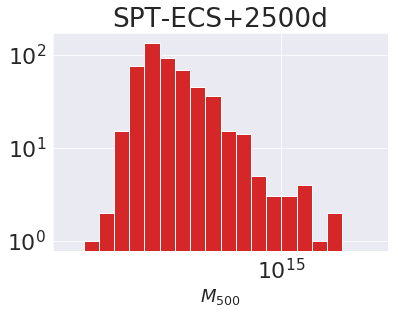

In [93]:
mass = data1['M500']*1e14
plt.hist(mass,bins=np.logspace(14.3,15.3,21),color='tab:red')
plt.yscale('log')
plt.xscale('log')
plt.title('SPT-ECS+2500d')
plt.xlabel(r'$M_{500}$',fontsize=18)

In [94]:
def sky_plot(RA,DEC,ax=None,title=''):
    if ax is None:
        fig = plt.figure(figsize=(8,6))
        ax = fig.add_subplot(111, projection="aitoff")

    ############################
    #Codigo para plotar coordenadas de objetos na esfera celeste
    #############################
    import astropy.coordinates as coord
    from astropy import units as u
    
    ra = coord.Angle(RA*u.degree)
    ra = ra.wrap_at(180*u.degree)
    dec = coord.Angle(DEC*u.degree)

    ##############
    #Plotando os objetos
    #import astropy.coordinates as coord
    ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
    ax.grid(True)
    ax.scatter(ra.radian, dec.radian, s=10, alpha=0.5)
    ax.set_title(title,fontsize=20)
    
    plt.subplots_adjust(top=0.9,bottom=0.0)
    # ax.set_xticklabels(['10h','8h','6h','4h','2h','0h','20h','18h','16h','14h','12h'])
    
    #fig.savefig(savefig, bbox_inches = "tight")
    #plt.clf()
    #plt.close()

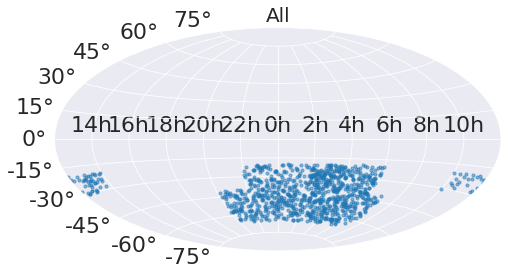

In [95]:
ra,dec=data['RA'], data['DEC']
sky_plot(ra,dec,title='All')

### Make Healpix Map

In [113]:
import sys
sys.path.append('../scripts/')
from helper import radec_pix, make_hpx_map

In [114]:
rad2deg  = 180/np.pi
rmax     = 8 #Mpc around each cluster
Nside    = 2
outdir   = '../data/'
hpx_file = outdir+'hpxmap_nside%i_full.fits'%Nside

In [115]:
hpx = radec_pix(ra,dec,nside=Nside)

data['tile'] = hpx

In [116]:
print('getting healpix map')

hpx_map = make_hpx_map(ra,dec,Nside,hpx_file)
hpx_values = np.array(hpx_map['hpx_value'])

getting healpix map
healpix map, nside 2
-> ../data/hpxmap_nside2_full.fits


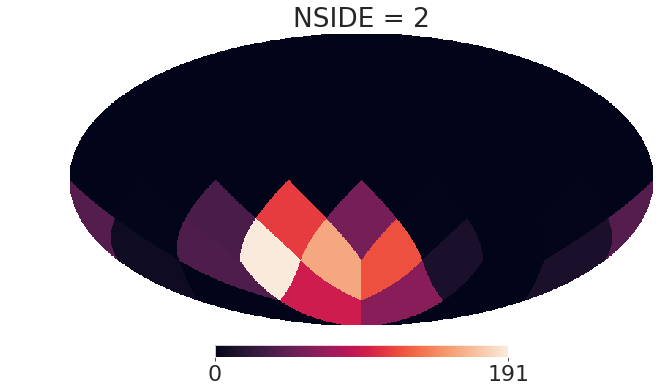

In [117]:
import healpy as hp
hp.mollview(hpx_values, nest=True, title="NSIDE = %i"%Nside)

In [118]:
print('# Tiles: ',np.count_nonzero(hpx_values>1))

('# Tiles: ', 14)


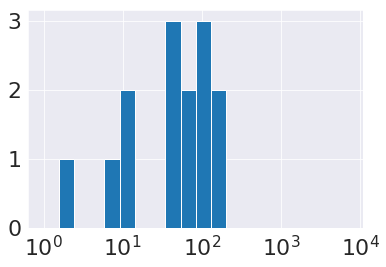

In [119]:
_ = plt.hist(hpx_map[hpx_values>1]['hpx_value'],bins=np.logspace(np.log10(1),np.log10(7000),21))
plt.xscale('log')

In [120]:
hpx_map[hpx_values>1]

hpx_pixel,hpx_value
int64,float64
17,58.0
21,37.0
25,42.0
33,97.0
34,191.0
35,158.0
36,114.0
38,8.0
39,39.0


In [121]:
data.write(fname_out, overwrite=True, format='fits')